In [1]:
% matplotlib inline
import pylab as plt
import numpy as np
import networkx as nx
import pandas as pd
import operator
import os
import re
from glob import glob
import os
os.chdir('/home/jagust/dino/surf/')
import util as util
import modularity as md
from scipy import stats
import operator

In [2]:
# Import Matrices
fmat = np.load('/home/jagust/dino/surf/thr_func_group_mat.npy')
fmat_neg = np.load('/home/jagust/dino/surf/thr_neg_func_mat.npy')
fmat_pos = np.load('/home/jagust/dino/surf/thr_pos_func_mat.npy')
pibmat = np.load('/home/jagust/dino/surf/pib_mat.npy')

pibmatpos = np.load('/home/jagust/dino/surf/neg_pib_mat.npy')
pibmatneg = np.load('/home/jagust/dino/surf/pos_pib_mat.npy')

thrpibmat, cost = util.threshold_adjacency_matrix(pibmat, cost = 0.20)
thrpibnet = nx.Graph(thrpibmat)

In [3]:
# Functional Network Formation
fnet = nx.from_numpy_matrix(fmat)
fnet_neg = nx.from_numpy_matrix(fmat_neg)
fnet_pos = nx.from_numpy_matrix(fmat_pos)

In [4]:
# PiB Netowrk Formation
pibnet = nx.from_numpy_matrix(pibmat)

In [5]:
def remove_neg_weight_edges(g):
    for edge in g.edges(data = True):
        if edge[2]['weight'] < 0.0:
            g.remove_edge(edge[0], edge[1])

In [6]:
remove_neg_weight_edges(pibnet)

In [7]:
pibnetpos = nx.from_numpy_matrix(pibmatpos)
pibnetneg = nx.from_numpy_matrix(pibmatneg)

In [8]:
remove_neg_weight_edges(pibnetpos)
remove_neg_weight_edges(pibnetneg)

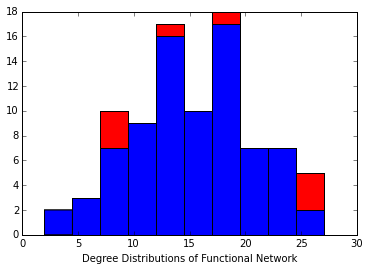

In [9]:
plt.hist(fnet_neg.degree().values(), color = 'r')
plt.hist(fnet_pos.degree().values())
plt.xlabel("Degree Distributions of Functional Network")

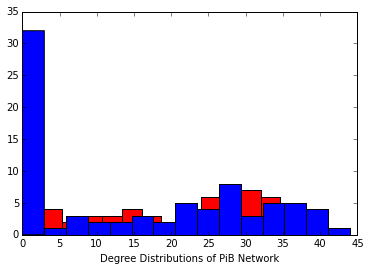

In [10]:
thrpibnetpos = nx.Graph(util.threshold_adjacency_matrix(pibmatpos, cost = 0.20)[0])
thrpibnetneg = nx.Graph(util.threshold_adjacency_matrix(pibmatneg, cost = 0.20)[0])

plt.hist(thrpibnetpos.degree().values(), color = 'r', bins = 15)
plt.hist(thrpibnetneg.degree().values(), color = 'b', bins = 15)
plt.xlabel("Degree Distributions of PiB Network")

In [11]:
# Importing Relevant Data
pib_path = "/home/jagust/dino/graph/data/spreadsheets/pib/pib_summary_April2015.csv"
pib_dat = np.genfromtxt(pib_path, dtype = None)
pib_df = pd.DataFrame(pib_dat[1:], columns = pib_dat[0,:])
#pib_df

# Load Matrices
globstr = "/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/*"
mat_paths = sorted(glob(globstr))
#mat_paths

master_subject_path = "/home/jagust/dino/graph/data/mri1.5/rest/master_subject_summary.xlsx"
subject_summary = pd.ExcelFile(master_subject_path).parse("Sheet1")
#subject_summary


# Importing Functions
def get_subsess(path):
    direc = "/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/"
    ind1 = len(direc)
    ind2 = ind1 + 18
    return path[ind1:ind2]
def is_geno_pos(ss):
    if len(ss) > 7:
        num_copies = subject_summary[subject_summary.Subsess == ss].values[0][6]
        if num_copies not in [0, 1, 2]:
            print "No genotype data: " + find_id(ss)
            return'x'
        else:
            return num_copies > 0.0
    else:
        num_copies = subject_summary[subject_summary.LBLID == ss].values[0][6]
        if num_copies not in [0, 1, 2]:
            print "No genotype data: " + find_id(ss)
            return
        else:
            return num_copies > 0.0

In [ ]:
pos_mods, pos_sp, pos_comp, pos_clust, pos_complex, pos_rc, pos_comm = [], [], [], [], [], [], []
neg_mods, neg_sp, neg_comp, neg_clust, neg_complex, neg_rc, neg_comm = [], [], [], [], [], [], []
sub = 1
for p in mat_paths:
    #print "Subject: " + str(sub) + " out of: " + str(len(mat_paths))
    sub += 1
    ss = get_subsess(p)
    try:
        mat = np.load(p)
        thr_func_mat, c = util.threshold_adjacency_matrix(mat, cost = 0.20)

        # Generate Graphs and Compute Metrics
        g = nx.Graph(thr_func_mat)
    #         ind = md.newman_partition(g, max_div=np.inf).index
    #         mod = md.GraphPartition(g, ind).modularity()
    #         sp = nx.average_shortest_path_length(g)
    #         clust = nx.average_clustering(g)
    #         rc = np.mean(nx.rich_club_coefficient(g).values()[0:23])
        comm = nx.communicability_centrality(g)
        #print str(comm)
        #print 'here'
        if type(is_geno_pos(ss)) == str:
                print "No geno data"
                continue
        elif is_geno_pos(ss):
    #             pos_mods.append(mod)
    #             pos_sp.append(sp)
    #             pos_comp.append(mod/sp)
    #             pos_clust.append(clust)
    #             pos_complex.append(clust/sp)
    #             pos_rc.append(rc)
            comm = 0.0
            c = nx.communicability(fnet)
            for reg in c:
                comm += sum(c[reg].values())
            pos_comm.append(comm / 2.0)

        else:
    #             neg_mods.append(mod)
    #             neg_sp.append(sp)
    #             neg_comp.append(mod/sp)
    #             neg_clust.append(clust)
    #             neg_complex.append(clust/sp)
    #             neg_rc.append(rc)
            comm = 0.0
            c = nx.communicability(fnet)
            for reg in c:
                comm += sum(c[reg].values())
            comms.append(comm / 2.0)        
            neg_comm.append(comm / 2.0)


    except:
        #print ss
        print 'here'
        continue

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
No genotype data: B07-218
No geno data
here
here
here
here
here
here
here
here
here
here
here
No genotype data: B07-251
No geno data
here
here
here
here
here
here
here
No genotype data: B07-267
No geno data
here
here
No genotype data: B07-274
No geno data
No genotype data: B07-275
No geno data
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
No genotype data: B08-252
No geno data
No genotype data: B08-252
No geno data
here
here
here
No genotype data: B09-206
No geno data
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
No genotype data: B09-280
No geno data
here
here
here
here
here
here
No genotype data: B10-202
No geno data
here
here
here
here
No genotype data: B10-215
No geno data
No genotype data: B10-216
No ge

In [78]:
pos_comm

[]

E4 Positive Mean: 0.376877014495 Std: 0.049904440347
E4 Negative Mean: 0.369826749414 Std: 0.0439764548025


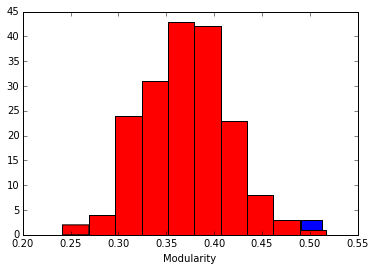

In [84]:
plt.hist(pos_mods, color = 'b')
plt.hist(neg_mods, color = 'r')
plt.xlabel("Modularity")
print "E4 Positive Mean: " + str(np.mean(pos_mods)) + " Std: " + str(np.std(pos_mods))
print "E4 Negative Mean: " + str(np.mean(neg_mods)) + " Std: " + str(np.std(neg_mods))

E4 Positive Mean: 2.11834525775 Std: 0.16297287992
E4 Negative Mean: 2.10520316106 Std: 0.0928697784565


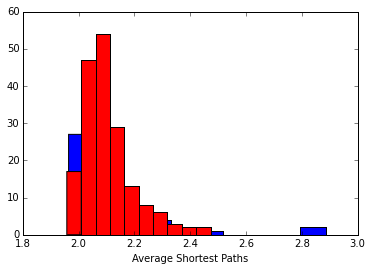

In [85]:
plt.hist(pos_sp, color = 'b')
plt.hist(neg_sp, color = 'r')
plt.xlabel("Average Shortest Paths")
print "E4 Positive Mean: " + str(np.mean(pos_sp)) + " Std: " + str(np.std(pos_sp))
print "E4 Negative Mean: " + str(np.mean(neg_sp)) + " Std: " + str(np.std(neg_sp))

E4 Positive Mean: 0.177590701209 Std: 0.0160894192102
E4 Negative Mean: 0.175432566875 Std: 0.0167916161278


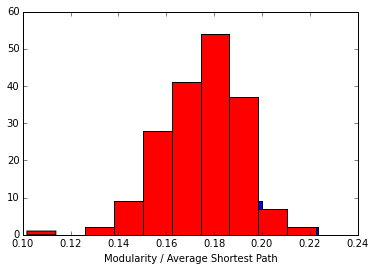

In [86]:
plt.hist(pos_comp, color = 'b')
plt.hist(neg_comp, color = 'r')
plt.xlabel("Modularity / Average Shortest Path")
print "E4 Positive Mean: " + str(np.mean(pos_comp)) + " Std: " + str(np.std(pos_comp))
print "E4 Negative Mean: " + str(np.mean(neg_comp)) + " Std: " + str(np.std(neg_comp))

E4 Positive Mean: 0.507650798955 Std: 0.0622020684407
E4 Negative Mean: 0.504393393272 Std: 0.0476054062317


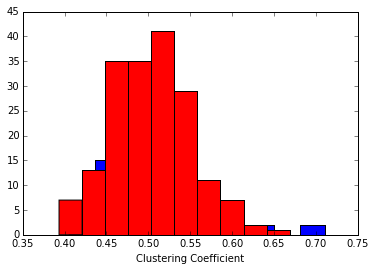

In [87]:
plt.hist(pos_clust, color = 'b')
plt.hist(neg_clust, color = 'r')
plt.xlabel("Clustering Coefficient")
print "E4 Positive Mean: " + str(np.mean(pos_clust)) + " Std: " + str(np.std(pos_clust))
print "E4 Negative Mean: " + str(np.mean(neg_clust)) + " Std: " + str(np.std(neg_clust))

E4 Positive Mean: 0.239057338993 Std: 0.0153381128215
E4 Negative Mean: 0.239168276846 Std: 0.0138303493484


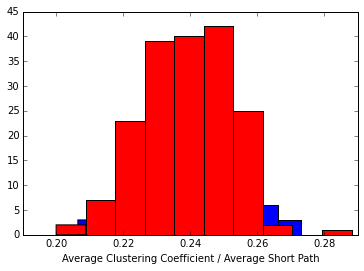

In [88]:
plt.hist(pos_complex, color = 'b')
plt.hist(neg_complex, color = 'r')
plt.xlabel("Average Clustering Coefficient / Average Short Path")
print "E4 Positive Mean: " + str(np.mean(pos_complex)) + " Std: " + str(np.std(pos_complex))
print "E4 Negative Mean: " + str(np.mean(neg_complex)) + " Std: " + str(np.std(neg_complex))

In [ ]:
plt.hist(pos_comm, color = 'b')
plt.hist(neg_comm, color = 'r')
plt.xlabel("Communicability")
print "E4 Positive Mean: " + str(np.mean(pos_comm)) + " Std: " + str(np.std(pos_comm))
print "E4 Negative Mean: " + str(np.mean(neg_comm)) + " Std: " + str(np.std(neg_comm))

In [98]:
t, p = stats.ttest_ind(pos_comm, neg_comm)
print "t: " + str(t)
print "p: " + str(p)

t: -1.06742828306
p: 0.286735502018


~ 1 July 2015 ~

Region-Wise Analysis of PiB Deposition
==

In [19]:
def find_id(s):
    inds = re.search('B[0,1]\d-\d\d\d', s)
    if inds is None:
        print 'Subject ID not found'
        return None
    else:
        inds = inds.span()
        return s[inds[0]: inds[1]]

In [20]:
# Load Subject Information
master_subject_path = "/home/jagust/dino/graph/data/mri1.5/rest/master_subject_summary.xlsx"
subject_summary = pd.ExcelFile(master_subject_path).parse("Sheet1")
#subject_summary

In [21]:
# Importing PiB Subject x Roi Data
pib_path = "/home/jagust/dino/graph/data/spreadsheets/pib/pib_summary_April2015.csv"
pib_dat = np.genfromtxt(pib_path, dtype = None)
pib_df = pd.DataFrame(pib_dat[1:], columns = pib_dat[0,:])
#pib_df

In [44]:
pib_vals = pd.DataFrame(np.array(pib_df.values[:, 3:], dtype = float))
pib_vals = np.array(pib_vals)
pib_vals.shape

(211, 80)

In [22]:
# Seperate E4 Neg and E4 Pos PiB Data
pib_pos_mat, pib_neg_mat = np.zeros(80), np.zeros(80)
for sub_dat in pib_dat[1:, :]:
    sub_data = subject_summary[subject_summary.LBLID == find_id(sub_dat[0])]
    if len(sub_data) == 0:
        print "Not in master subject summary file: " + find_id(sub_dat[0])
        continue
    gen_copies = sub_data.values[0][6]
    if gen_copies < 3 and gen_copies > 0:
        pib_pos_mat = np.vstack((pib_pos_mat, sub_dat[3:]))
    elif gen_copies == 0:
        pib_neg_mat = np.vstack((pib_neg_mat, sub_dat[3:]))
    elif gen_copies not in [0, 1, 2]:
        print "No genotype data: " + find_id(sub_dat[0])
pib_pos_mat = pib_pos_mat[1:,:]
pib_neg_mat = pib_neg_mat[1:,:]

No genotype data: B07-267
No genotype data: B07-271
No genotype data: B10-216
No genotype data: B10-232
No genotype data: B10-257
No genotype data: B10-261
No genotype data: B10-264
No genotype data: B10-294
Not in master subject summary file: B10-295
Not in master subject summary file: B10-299
No genotype data: B11-204
No genotype data: B11-208
No genotype data: B12-230
Not in master subject summary file: B12-294
No genotype data: B12-339
No genotype data: B14-265
No genotype data: B14-285
No genotype data: B14-295


In [57]:
# Calculate Correlation Matrix for Subgroups
pos_pib_vals = pd.DataFrame(np.array(pib_pos_mat, dtype = float))
pos_pib_vals = np.array(pos_pib_vals)

neg_pib_vals = pd.DataFrame(np.array(pib_neg_mat, dtype = float))
neg_pib_vals = np.array(neg_pib_vals)

In [73]:
l = range(80)
important = []
for reg in l:
    pos_vals = pib_pos_mat[:,reg:reg+1]
    neg_vals = pib_neg_mat[:,reg:reg+1]
    
    pos_list = [float(i[0]) for i in pos_vals]
    neg_list = [float(i[0]) for i in neg_vals]
    
    t, p = stats.ttest_ind(pos_list, neg_list)
    if p < (0.05 / 80.0):
        important.append(reg)
        print "Region: " + str(reg)
        print "     t: " + str(t)
        print "     p: " + str(p)


Region: 1
     t: 3.97138925066
     p: 0.000101148149487
Region: 14
     t: 4.29867452999
     p: 2.73630623681e-05
Region: 15
     t: 4.45478329248
     p: 1.4279296742e-05
Region: 20
     t: 3.70254882896
     p: 0.000279229097408
Region: 22
     t: 3.51660460264
     p: 0.000546038217948
Region: 25
     t: 4.24284420673
     p: 3.43856673967e-05
Region: 27
     t: 4.73405176953
     p: 4.27791723666e-06
Region: 31
     t: 4.29027406137
     p: 2.83239514556e-05
Region: 32
     t: 4.60531574565
     p: 7.50586972058e-06
Region: 33
     t: 4.43591443331
     p: 1.54610650024e-05
Region: 39
     t: 4.53567274376
     p: 1.0126483196e-05
Region: 40
     t: 5.33765024995
     p: 2.65293898181e-07
Region: 41
     t: 4.23913618877
     p: 3.49086293893e-05
Region: 43
     t: 3.69363543352
     p: 0.000288523748925
Region: 44
     t: 3.96438033749
     p: 0.000103932058215
Region: 46
     t: 3.56635820205
     p: 0.000457515256451
Region: 48
     t: 3.89025034376
     p: 0.000138199138127


In [75]:
len(important)

31

In [54]:
l = [i[0] for i in neg_vals]

In [56]:
l[0]

0.0